In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_excel('C:\\Users\\Din islam\\OneDrive\\Desktop\\Assignment_03\\Assignment _03_Dataset.xlsx')
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [3]:
df.shape

(7, 2)

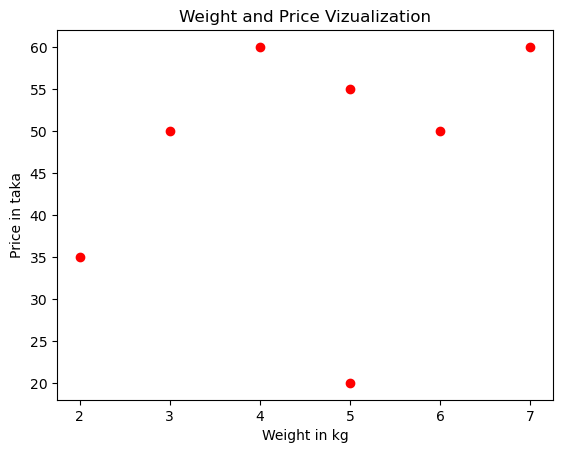

In [4]:
plt.scatter(df[['Weight']],df[['Price']],color = 'red')
plt.xlabel('Weight in kg')
plt.ylabel('Price in taka')
plt.title('Weight and Price Vizualization')
plt.show()

In [5]:
# for manual calculation and prediction
x = df['Weight']
y = df['Price']

# for sklearn algorithm
x1 = df[['Weight']]
y1 = df[['Price']]

In [6]:
x.mean()

4.571428571428571

In [7]:
y.mean()

47.142857142857146

In [8]:
mean_x = np.mean(x)
mean_y = np.mean(y)

In [9]:
mean_x

4.571428571428571

In [10]:
mean_y

47.142857142857146

In [11]:
dev_x = x - mean_x
dev_y = y - mean_y

In [12]:
dev_x

0   -2.571429
1   -0.571429
2    0.428571
3   -1.571429
4    1.428571
5    0.428571
6    2.428571
Name: Weight, dtype: float64

In [13]:
dev_y

0   -12.142857
1    12.857143
2   -27.142857
3     2.857143
4     2.857143
5     7.857143
6    12.857143
Name: Price, dtype: float64

In [14]:
m = np.sum(dev_x * dev_y)/ np.sum(dev_x**2)
m

2.620967741935484

In [15]:
c = mean_y - m*mean_x
c

35.16129032258065

In [16]:
# prediction for x = 6
# y = mx+c

y_6 = m*6+c
y_6

50.88709677419355

# Sklearn algorithm

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(x1,y1)

LinearRegression()

In [21]:
reg.coef_

array([[2.62096774]])

In [22]:
reg.intercept_

array([35.16129032])

In [23]:
reg.predict([[6]])

array([[50.88709677]])

In [24]:
df['Predicted_Price'] = reg.predict(x1)

In [25]:
df.head()

,Weight,Price,Predicted_Price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [26]:
df['Residuals'] = df['Price'] - df['Predicted_Price']
df.head()

,Weight,Price,Predicted_Price,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


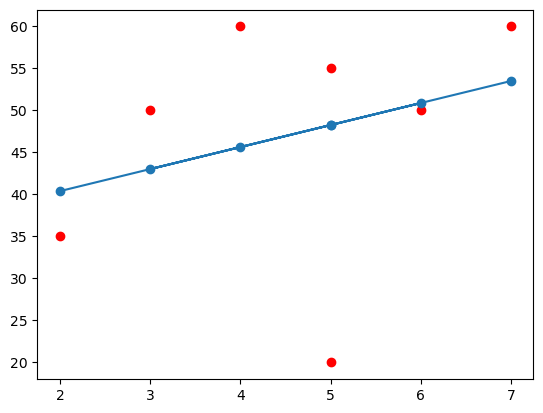

In [27]:
# for best fit line
plt.plot(x1,df[['Predicted_Price']]) # best fit line
plt.scatter(x1,y1,color = 'red')
plt.scatter(x1,df[['Predicted_Price']])

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mae = mean_absolute_error(df['Predicted_Price'],df['Price'])

In [30]:
mae

9.87327188940092

In [31]:
mse = mean_squared_error(df['Predicted_Price'],df['Price'])
mse

167.30990783410135